In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
df_non_financials=pd.read_csv("D:\\Script\\regression_nofin_final.csv")

In [6]:
df_non_financials = df_non_financials.loc[:, ~df_non_financials.columns.str.contains('_x')]


In [3]:
df_non_financials = df_non_financials[df_non_financials['QandAPreASpeaker_WordCount_Total'] > 200]
df_non_financials = df_non_financials[df_non_financials['PresentationPreSpeaker_WordCount_Total'] > 200]
df_non_financials = df_non_financials[df_non_financials['QandAPreQAnalyst_WordCount_Total'] > 200]

df_non_financials

,Unnamed: 0,gvkey,quarter_transformed,title,url,date,GICS Sector,GICS Sub-Industry,CIK,Founded,...,next_quarter_eps,PresentationPreSpeaker_WordCount_Avg,QandAPreASpeaker_WordCount_Avg,QandAPreQAnalyst_WordCount_Avg,PresentationPreSpeaker_WordCount_Total_log,PresentationPreSpeaker_WordCount_Avg_log,QandAPreASpeaker_WordCount_Total_log,QandAPreASpeaker_WordCount_Avg_log,QandAPreQAnalyst_WordCount_Total_log,QandAPreQAnalyst_WordCount_Avg_log
0,0,1045,2014Q1,"American Airlines (AAL) CEO, Doug Parker on Q1...",https://seekingalpha.com/article/4341573-ameri...,2020-04-30,Industrials,Passenger Airlines,6201.0,1934.0,...,-4.82,1014.500000,1559.600000,655.416667,8.308692,6.923136,8.961751,7.352826,8.970305,6.486796
1,25,1045,2020Q2,American Airlines Group Inc. (AAL) CEO Doug Pa...,https://seekingalpha.com/article/4360357-ameri...,2020-07-23,Industrials,Passenger Airlines,6201.0,1934.0,...,-4.71,1200.000000,2607.500000,654.875000,8.188967,7.090910,9.252537,7.866531,9.257129,6.485970
2,26,1045,2020Q3,American Airlines Group Inc. (AAL) CEO Doug Pa...,https://seekingalpha.com/article/4380763-ameri...,2020-10-22,Industrials,Passenger Airlines,6201.0,1934.0,...,-3.81,988.750000,1387.666667,528.375000,8.282989,6.897452,9.027259,7.236099,9.042513,6.271697
3,27,1045,2020Q4,American Airlines Group's (AAL) CEO Doug Parke...,https://seekingalpha.com/article/4401834-ameri...,2021-01-28,Industrials,Passenger Airlines,6201.0,1934.0,...,-1.97,1120.250000,1415.166667,574.733333,8.407825,7.022199,9.046880,7.255709,9.062072,6.355645
4,28,1045,2021Q1,"American Airlines Group, Inc. (AAL) CEO Doug P...",https://seekingalpha.com/article/4420728-ameri...,2021-04-22,Industrials,Passenger Airlines,6201.0,1934.0,...,0.03,1161.750000,2392.250000,537.111111,8.444192,7.058543,9.166388,7.780408,9.176680,6.288065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7772,20846,316056,2022Q3,Allegion plc (ALLE) Q3 2022 Earnings Call Tran...,https://seekingalpha.com/article/4549821-alleg...,2022-10-27,Industrials,Building Products,1579241.0,1908.0,...,1.54,914.000000,1759.500000,707.200000,7.916807,6.818924,8.166216,7.473353,8.171034,6.562727
7773,20847,316056,2022Q4,Allegion plc (ALLE) Q4 2022 Earnings Call Tran...,https://seekingalpha.com/article/4580712-alleg...,2023-02-22,Industrials,Building Products,1579241.0,1908.0,...,1.40,987.666667,2519.000000,506.500000,7.994295,6.896357,8.524963,7.832014,8.530307,6.229497
7774,20848,316056,2023Q1,Allegion plc (ALLE) Q1 2023 Earnings Call Tran...,https://seekingalpha.com/article/4596733-alleg...,2023-04-26,Industrials,Building Products,1579241.0,1908.0,...,1.62,834.000000,1978.000000,818.200000,7.825245,6.727432,8.283241,7.590347,8.316789,6.708328
7775,20849,316056,2023Q2,Allegion plc (ALLE) Q2 2023 Earnings Call Tran...,https://seekingalpha.com/article/4620029-alleg...,2023-07-26,Industrials,Building Products,1579241.0,1908.0,...,1.78,930.333333,2904.500000,744.625000,7.934513,6.836617,8.667336,7.974361,8.692490,6.614223


In [58]:
df_non_financials.to_csv('regression_nofin_finalLM.csv')

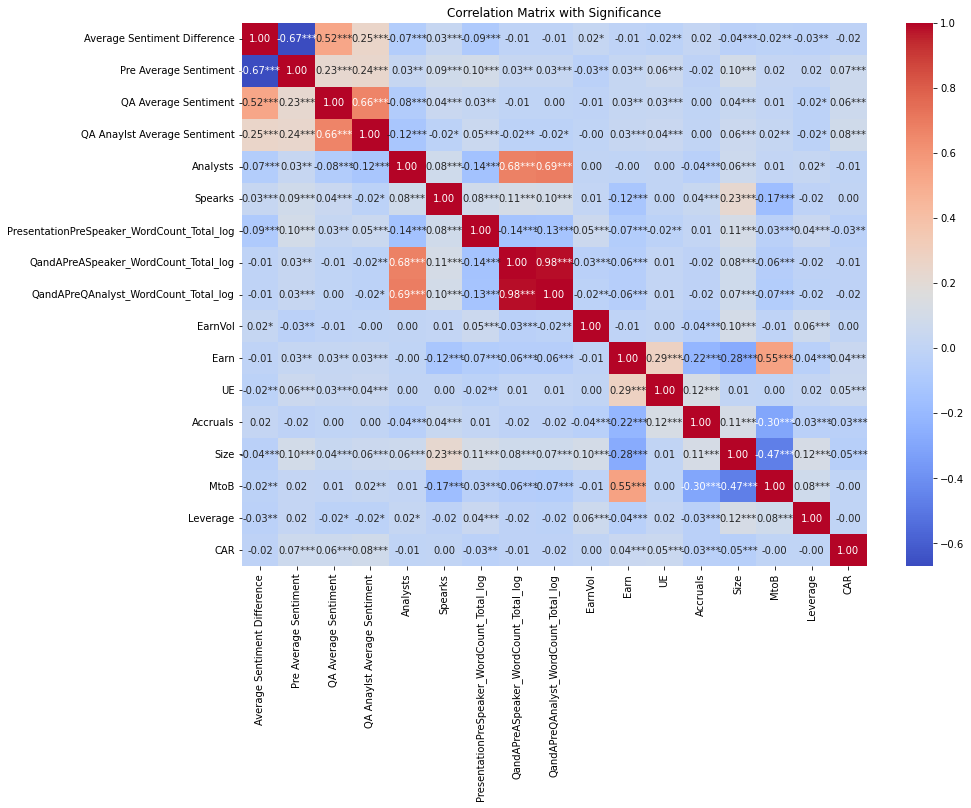

导出完成，文件名为 'correlation_and_pvalues.csv'


In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import itertools

# 假设 df 是包含所有数据的 DataFrame
df_co = df_non_financials_new[['Average Sentiment Difference', 'Pre Average Sentiment'	,'QA Average Sentiment','QA Anaylst Average Sentiment',
                                   'Analysts', 'Spearks',  'PresentationPreSpeaker_WordCount_Total_log',
                                   'QandAPreASpeaker_WordCount_Total_log', 'QandAPreQAnalyst_WordCount_Total_log',
'EarnVol', 'Earn', 'UE', 'Accruals', 'Size', 'MtoB', 'Leverage','CAR']]

corr_matrix = df_co.corr()
p_values = pd.DataFrame(index=df_co.columns, columns=df_co.columns)

# 填充p值矩阵
for col1, col2 in itertools.combinations(df_co.columns, 2):
    corr, p = pearsonr(df_co[col1].dropna(), df_co[col2].dropna())
    p_values.at[col1, col2] = p
    p_values.at[col2, col1] = p

# 创建带星号的注释矩阵
annotations = corr_matrix.applymap(lambda x: f"{x:.2f}")
for i in range(p_values.shape[0]):
    for j in range(p_values.shape[1]):
        if i != j:
            p = float(p_values.iloc[i, j])
            if p < 0.01:
                annotations.iloc[i, j] += '***'  # p < 0.01
            elif p < 0.05:
                annotations.iloc[i, j] += '**'   # p < 0.05
            elif p < 0.1:
                annotations.iloc[i, j] += '*'    # p < 0.1

# 可视化相关系数矩阵
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=annotations, cmap='coolwarm', fmt="")
plt.title('Correlation Matrix with Significance')
plt.show()
# 创建一个新的 DataFrame 用于输出
output_df = pd.DataFrame(index=df_co.columns, columns=df_co.columns)

# 填充新 DataFrame，将相关系数和 p 值放在一起
for col in output_df.columns:
    for row in output_df.index:
        corr_value = corr_matrix.at[row, col]
        p_value = p_values.at[row, col]
        output_df.at[row, col] = f"{corr_value:.3f} (p={p_value:.3g})"

# 导出到 CSV 文件
output_df.to_csv("LM_overall_correlation_and_pvalues.csv")

print("导出完成，文件名为 'correlation_and_pvalues.csv'")
# 将相关系数矩阵保存为Excel文件
# corr_matrix.to_excel("correlation_matrix_LM.xlsx", engine='openpyxl')

In [10]:
import pandas as pd
import numpy as np


# 假设 df_non_financials 是原始的 DataFrame
columns_to_winsorize = [
    'QA Average Sentiment', 'Pre Average Sentiment', 'Average Sentiment Difference', 'EarnVol', 'Earn',
    'UE', 'Accruals', 'Size', 'MtoB', 'Leverage', 'Analysts', 'Spearks', 'QA Anaylst Average Sentiment',
    'PresentationPreSpeaker_WordCount_Total_log', 'QandAPreASpeaker_WordCount_Total_log',
    'QandAPreQAnalyst_WordCount_Total_log', 'CAR'
]

# 初始化新的数据框
df_non_financials_new = df_non_financials.copy()

# 对每一列进行Winsorization，处理极端小值和大值
for column in columns_to_winsorize:
    q01 = df_non_financials[column].quantile(0.01)
    q99 = df_non_financials[column].quantile(0.99)
    
    # 使用apply和lambda函数进行Winsorization
    df_non_financials_new[column] = df_non_financials[column].apply(lambda x: max(min(x, q99), q01))


In [11]:
'''1-1 LM All variable-CAR
overall sample with Winsorization(1,99)'''

quarter_dummies = pd.get_dummies(df_non_financials_new['quarter_transformed'], prefix='Qtr', drop_first=True)
cik_dummies = pd.get_dummies(df_non_financials_new['CIK'], prefix='CIK', drop_first=True)

df_non_financials_regression = pd.concat([df_non_financials_new, quarter_dummies, cik_dummies], axis=1)
df_non_financials_regression['Interaction'] = df_non_financials_regression['Average Sentiment Difference'] * df_non_financials_regression['UE']
#no financials regression
X = sm.add_constant(df_non_financials_regression[['Average Sentiment Difference','EarnVol', 'Earn','UE', 'Accruals', 'Size', 'MtoB', 'Leverage',
                         'Analysts', 'Spearks','QA Anaylst Average Sentiment','PresentationPreSpeaker_WordCount_Total_log',
                         'QandAPreASpeaker_WordCount_Total_log','QandAPreQAnalyst_WordCount_Total_log'] + list(quarter_dummies.columns) + list(cik_dummies.columns)])
y = df_non_financials_regression['CAR']

# 创建模型并拟合数据
model = sm.OLS(y, X).fit(cov_type='cluster', cov_kwds={'groups': df_non_financials_regression['CIK']})


# 打印模型结果
print("columns(4):LM regression overall sample with Winsorization(1,99):")

print(model.summary())

LM regression:


c:\Users\accstu\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 467, but rank is 51
  warnings.warn('covariance of constraints does not have full '


                            OLS Regression Results                            
Dep. Variable:                    CAR   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                -1.188e+10
Date:                Thu, 06 Jun 2024   Prob (F-statistic):               1.00
Time:                        15:58:07   Log-Likelihood:                -22300.
No. Observations:                7151   AIC:                         4.554e+04
Df Residuals:                    6683   BIC:                         4.875e+04
Df Model:                         467                                         
Covariance Type:              cluster                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [12]:
'''1-2 LM Pres Tone- CAR 
#overall sample with Winsorization(1,99)'''

quarter_dummies = pd.get_dummies(df_non_financials_new['quarter_transformed'], prefix='Qtr', drop_first=True)
cik_dummies = pd.get_dummies(df_non_financials_new['CIK'], prefix='CIK', drop_first=True)

df_non_financials_regression = pd.concat([df_non_financials_new, quarter_dummies, cik_dummies], axis=1)
#no financials regression ,'QA Average Sentiment','QA Anaylst Average Sentiment'
X = sm.add_constant(df_non_financials_regression[['Pre Average Sentiment'
                                                  ] + list(quarter_dummies.columns) + list(cik_dummies.columns)])
y = df_non_financials_regression['CAR']

# 创建模型并拟合数据
model = sm.OLS(y, X).fit(cov_type='cluster', cov_kwds={'groups': df_non_financials_regression['CIK']})


# 打印模型结果
print("columns(1):LM regression (Pres Tone- CAR) Overall Sample:")
print(model.summary())

LM overall sample with Winsorization(1,99):
                            OLS Regression Results                            
Dep. Variable:                    CAR   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                -2.178e+13
Date:                Thu, 06 Jun 2024   Prob (F-statistic):               1.00
Time:                        16:02:04   Log-Likelihood:                -22388.
No. Observations:                7151   AIC:                         4.569e+04
Df Residuals:                    6696   BIC:                         4.881e+04
Df Model:                         454                                         
Covariance Type:              cluster                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

c:\Users\accstu\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 454, but rank is 39
  warnings.warn('covariance of constraints does not have full '


In [13]:
'''1-3 LM Answer Tone- CAR 
#overall sample with Winsorization(1,99)'''
X = sm.add_constant(df_non_financials_regression[['QA Average Sentiment'
                                                  ] + list(quarter_dummies.columns) + list(cik_dummies.columns)])
y = df_non_financials_regression['CAR']

# 创建模型并拟合数据
model = sm.OLS(y, X).fit(cov_type='cluster', cov_kwds={'groups': df_non_financials_regression['CIK']})


# 打印模型结果
print("columns(2):LM regression (Answer Tone- CAR) Overall Sample:")
print(model.summary())

columns(2):LM regression (Ques Tone- CAR) Overall Sample:
                            OLS Regression Results                            
Dep. Variable:                    CAR   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                -3.386e+13
Date:                Thu, 06 Jun 2024   Prob (F-statistic):               1.00
Time:                        16:05:15   Log-Likelihood:                -22396.
No. Observations:                7151   AIC:                         4.570e+04
Df Residuals:                    6696   BIC:                         4.883e+04
Df Model:                         454                                         
Covariance Type:              cluster                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------

c:\Users\accstu\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 454, but rank is 39
  warnings.warn('covariance of constraints does not have full '


In [14]:
'''1-4 LM Ques Tone- CAR 
#overall sample with Winsorization(1,99)'''
X = sm.add_constant(df_non_financials_regression[['QA Anaylst Average Sentiment'
                                                  ] + list(quarter_dummies.columns) + list(cik_dummies.columns)])
y = df_non_financials_regression['CAR']

# 创建模型并拟合数据
model = sm.OLS(y, X).fit(cov_type='cluster', cov_kwds={'groups': df_non_financials_regression['CIK']})


# 打印模型结果
print("columns(3):LM regression (Ques Tone- CAR) Overall Sample:")
print(model.summary())

columns(3):LM regression (Answer Tone- CAR) Overall Sample:
                            OLS Regression Results                            
Dep. Variable:                    CAR   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                -4.709e+12
Date:                Thu, 06 Jun 2024   Prob (F-statistic):               1.00
Time:                        16:06:22   Log-Likelihood:                -22377.
No. Observations:                7151   AIC:                         4.566e+04
Df Residuals:                    6696   BIC:                         4.879e+04
Df Model:                         454                                         
Covariance Type:              cluster                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------

c:\Users\accstu\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 454, but rank is 39
  warnings.warn('covariance of constraints does not have full '


In [15]:

# 创建一个新的DataFrame，只包含这些列
desc = df_non_financials_new.describe()

desc.to_csv('sentiment_data_LM_0606.csv')

print("提取的sentiment相关数据已保存为 sentiment_data_LM.csv")

提取的sentiment相关数据已保存为 sentiment_data_LM.csv


In [141]:
import pandas as pd
import numpy as np
import statsmodels.api as sm  # 确保已经导入了 statsmodels 库

# 假设 df_non_financials_regression 是原始的 DataFrame
# 先按 'Average Sentiment Difference' 分成大于0，等于0，小于0三组
df_non_financials_regression['Sentiment_Group'] = np.select(
    [
        df_non_financials_regression['Average Sentiment Difference'] > 0, 
        df_non_financials_regression['Average Sentiment Difference'] == 0,
        df_non_financials_regression['Average Sentiment Difference'] < 0
    ], 
    [
        'Positive', 
        'Zero', 
        'Negative'
    ], 
    default='Unknown'
)

# 对于小于0的样本，进一步按照中位数进行分组
negative_df = df_non_financials_regression[df_non_financials_regression['Sentiment_Group'] == 'Negative']
median_value = negative_df['Average Sentiment Difference'].median()
negative_df['Subgroup'] = np.where(negative_df['Average Sentiment Difference'] > median_value, 'Below Median', 'Above Median')

# 将处理过的分组数据合并回主数据框
df_non_financials_regression.update(negative_df)

# 定义运行回归的函数
def run_regression(df_group, group_name):
    X = sm.add_constant(df_group[['Average Sentiment Difference','EarnVol', 'Earn','UE', 'Accruals', 'Size', 'MtoB', 'Leverage',
                         'Analysts', 'Spearks','QA Anaylst Average Sentiment','PresentationPreSpeaker_WordCount_Total_log',
                         'QandAPreASpeaker_WordCount_Total_log','QandAPreQAnalyst_WordCount_Total_log'] + list(quarter_dummies.columns) + list(cik_dummies.columns)])
    y = df_group['CAR']

    # 创建模型并拟合数据
    model = sm.OLS(y, X).fit(cov_type='cluster', cov_kwds={'groups': df_group['CIK']})

    # 打印模型结果
    print(f"\n回归分析结果 - {group_name} Group:")
    print(model.summary())

# 分别对所有分组进行回归分析
for group in df_non_financials_regression['Sentiment_Group'].unique():
    df_group = df_non_financials_regression[df_non_financials_regression['Sentiment_Group'] == group]
    run_regression(df_group, group)

# 对小于0的两个子组也进行回归分析
for subgroup in ['Below Median', 'Above Median']:
    df_subgroup = negative_df[negative_df['Subgroup'] == subgroup]
    run_regression(df_subgroup, subgroup)


<ipython-input-141-e4c9eda8a871>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_df['Subgroup'] = np.where(negative_df['Average Sentiment Difference'] > median_value, 'Below Median', 'Above Median')



回归分析结果 - Negative Group:


c:\Users\accstu\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 462, but rank is 52
  warnings.warn('covariance of constraints does not have full '


                            OLS Regression Results                            
Dep. Variable:                    CAR   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                -4.361e+10
Date:                Fri, 07 Jun 2024   Prob (F-statistic):               1.00
Time:                        05:13:25   Log-Likelihood:                -16726.
No. Observations:                5396   AIC:                         3.437e+04
Df Residuals:                    4935   BIC:                         3.741e+04
Df Model:                         460                                         
Covariance Type:              cluster                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

c:\Users\accstu\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 462, but rank is 52
  warnings.warn('covariance of constraints does not have full '


                            OLS Regression Results                            
Dep. Variable:                    CAR   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     3.404
Date:                Fri, 07 Jun 2024   Prob (F-statistic):           1.25e-11
Time:                        05:13:26   Log-Likelihood:                -5387.1
No. Observations:                1755   AIC:                         1.151e+04
Df Residuals:                    1386   BIC:                         1.353e+04
Df Model:                         368                                         
Covariance Type:              cluster                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

c:\Users\accstu\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 462, but rank is 51
  warnings.warn('covariance of constraints does not have full '


                            OLS Regression Results                            
Dep. Variable:                    CAR   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                 2.646e+10
Date:                Fri, 07 Jun 2024   Prob (F-statistic):               0.00
Time:                        05:13:27   Log-Likelihood:                -8284.1
No. Observations:                2698   AIC:                         1.746e+04
Df Residuals:                    2252   BIC:                         2.009e+04
Df Model:                         445                                         
Covariance Type:              cluster                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

c:\Users\accstu\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 462, but rank is 52
  warnings.warn('covariance of constraints does not have full '


In [27]:
'''CEO'''
CEO = pd.read_csv('D:\Script\CEO.csv',low_memory=False)
# 删除 'url' 列中的重复值，保留每个重复组的第一个值
CEO_unique = CEO.drop_duplicates(subset=['url'], keep='first')



In [28]:
df_CEO = df_non_financials_new.merge(
    CEO,
    how='inner',  # 只保留两个数据集中都有匹配的行
    left_on=['url'],  # df_sandp500_ECT_wrds_compustat_event
    right_on=['url']  # wrds_evebt中用于匹配的列
)

In [29]:
df_CEO = df_CEO.drop_duplicates(subset=['url'], keep='first')
df_CEO

,Unnamed: 0,gvkey,quarter_transformed,title,url,date,GICS Sector,GICS Sub-Industry,CIK,Founded,...,PresentationPreSpeaker_WordCount_Avg,QandAPreASpeaker_WordCount_Avg,QandAPreQAnalyst_WordCount_Avg,PresentationPreSpeaker_WordCount_Total_log,PresentationPreSpeaker_WordCount_Avg_log,QandAPreASpeaker_WordCount_Total_log,QandAPreASpeaker_WordCount_Avg_log,QandAPreQAnalyst_WordCount_Total_log,QandAPreQAnalyst_WordCount_Avg_log,CEO
0,0,1045,2014Q1,"American Airlines (AAL) CEO, Doug Parker on Q1...",https://seekingalpha.com/article/4341573-ameri...,2020-04-30,Industrials,Passenger Airlines,6201.0,1934.0,...,1014.500000,1559.600000,655.416667,8.308692,6.923136,8.961751,7.352826,8.970305,6.486796,['Doug Parker']
1,25,1045,2020Q2,American Airlines Group Inc. (AAL) CEO Doug Pa...,https://seekingalpha.com/article/4360357-ameri...,2020-07-23,Industrials,Passenger Airlines,6201.0,1934.0,...,1200.000000,2607.500000,654.875000,8.188967,7.090910,9.252537,7.866531,9.257129,6.485970,['Doug Parker']
2,26,1045,2020Q3,American Airlines Group Inc. (AAL) CEO Doug Pa...,https://seekingalpha.com/article/4380763-ameri...,2020-10-22,Industrials,Passenger Airlines,6201.0,1934.0,...,988.750000,1387.666667,528.375000,8.282989,6.897452,9.027259,7.236099,9.042513,6.271697,['Doug Parker']
3,27,1045,2020Q4,American Airlines Group's (AAL) CEO Doug Parke...,https://seekingalpha.com/article/4401834-ameri...,2021-01-28,Industrials,Passenger Airlines,6201.0,1934.0,...,1120.250000,1415.166667,574.733333,8.407825,7.022199,9.046880,7.255709,9.062072,6.355645,['Doug Parker']
4,28,1045,2021Q1,"American Airlines Group, Inc. (AAL) CEO Doug P...",https://seekingalpha.com/article/4420728-ameri...,2021-04-22,Industrials,Passenger Airlines,6201.0,1934.0,...,1161.750000,2392.250000,537.111111,8.444192,7.058543,9.166388,7.780408,9.176680,6.288065,['Doug Parker']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7178,20846,316056,2022Q3,Allegion plc (ALLE) Q3 2022 Earnings Call Tran...,https://seekingalpha.com/article/4549821-alleg...,2022-10-27,Industrials,Building Products,1579241.0,1908.0,...,914.000000,1759.500000,707.200000,7.916807,6.818924,8.166216,7.473353,8.171034,6.562727,['John Stone']
7179,20847,316056,2022Q4,Allegion plc (ALLE) Q4 2022 Earnings Call Tran...,https://seekingalpha.com/article/4580712-alleg...,2023-02-22,Industrials,Building Products,1579241.0,1908.0,...,987.666667,2519.000000,506.500000,7.994295,6.896357,8.524963,7.832014,8.530307,6.229497,['John Stone']
7180,20848,316056,2023Q1,Allegion plc (ALLE) Q1 2023 Earnings Call Tran...,https://seekingalpha.com/article/4596733-alleg...,2023-04-26,Industrials,Building Products,1579241.0,1908.0,...,834.000000,1978.000000,818.200000,7.825245,6.727432,8.283241,7.590347,8.316789,6.708328,['John Stone']
7181,20849,316056,2023Q2,Allegion plc (ALLE) Q2 2023 Earnings Call Tran...,https://seekingalpha.com/article/4620029-alleg...,2023-07-26,Industrials,Building Products,1579241.0,1908.0,...,930.333333,2904.500000,744.625000,7.934513,6.836617,8.667336,7.974361,8.692490,6.614223,['John Stone']


In [100]:
import ast

def parse_string_to_list(row):
    try:
        # 尝试将字符串解析为列表
        return ast.literal_eval(row)
    except:
        # 如果解析失败，返回空列表
        return []

# 应用这个转换到 CallParticipants 列
df_CEO['CallParticipants'] = df_CEO['CallParticipants'].apply(parse_string_to_list)
df_CEO['CEO'] = df_CEO['CEO'].apply(parse_string_to_list)

# 定义一个函数，将字符串形式的字典转换为字典
def convert_to_dict(value):
    if isinstance(value, str):
        try:
            return ast.literal_eval(value)
        except (ValueError, SyntaxError):
            return None
    return value

df_CEO['Sentiment Score Differences'] = df_CEO['Sentiment Score Differences'].apply(convert_to_dict)




In [101]:
df_CEO['PresentationPreSpeaker_WordCount'] = df_CEO['PresentationPreSpeaker_WordCount'].apply(convert_to_dict)
df_CEO['QandAPreASpeaker_WordCount'] = df_CEO['QandAPreASpeaker_WordCount'].apply(convert_to_dict)

def extract_ceo_sentiment_and_wordcount(row):
    ceo_dict = row['Sentiment Score Differences']
    pres_word_count_dict = row['PresentationPreSpeaker_WordCount']
    qanda_word_count_dict = row['QandAPreASpeaker_WordCount']
    ceo_name_list = row['CEO']
    
    if isinstance(ceo_name_list, list):
        if len(ceo_name_list) == 1:
            ceo_name = ceo_name_list[0].strip().strip("'")  # 从列表中提取名字，并去掉多余的单引号和空白字符
            if ceo_name in ceo_dict:
                ceo_sentiment = ceo_dict[ceo_name]
            else:
                ceo_sentiment = None
            
            pres_word_count = pres_word_count_dict.get(ceo_name, None)
            qanda_word_count = qanda_word_count_dict.get(ceo_name, None)
            
            return {
                'ceo_sentiment': ceo_sentiment,
                'pres_word_count': pres_word_count,
                'qanda_word_count': qanda_word_count
            }
    
    return {
        'ceo_sentiment': None,
        'pres_word_count': None,
        'qanda_word_count': None
    }

# 在 'Sentiment Score Differences' 列中应用函数，提取 CEO 的情绪分数和词数
df_CEO['CEO_Sentiment_WordCount'] = df_CEO.apply(extract_ceo_sentiment_and_wordcount, axis=1)

# 分别创建 'CEO_Sentiment', 'Pres_WordCount' 和 'QandA_WordCount' 列
df_CEO['CEO_Sentiment'] = df_CEO['CEO_Sentiment_WordCount'].apply(lambda x: x['ceo_sentiment'])
df_CEO['Pres_WordCount'] = df_CEO['CEO_Sentiment_WordCount'].apply(lambda x: x['pres_word_count'])
df_CEO['QandA_WordCount'] = df_CEO['CEO_Sentiment_WordCount'].apply(lambda x: x['qanda_word_count'])


In [103]:
df_CEO['Pres_WordCount']

0       1450
1       1668
2       1137
3       1209
4        950
        ... 
6313    1411
6314    1348
6315    1200
6316    1483
6317    1438
Name: Pres_WordCount, Length: 6318, dtype: int64

In [83]:
def find_ceo_in_qanda(row):
    ceo_name = row['CEO'][0] if row['CEO'] and len(row['CEO']) > 0 else None
    if not ceo_name:
        return None  # 如果没有 CEO 名字，则不进行检查

    q_and_a = row['QandA']
    participants = row['CallParticipants']

    # 初始化记录提到 CEO 的参与者列表
    mentioned_by = []

    if len(participants) > 0:
        for i in range(len(participants) - 1):
            try:
                # 查找第一个参与者在 QandA 中的第一次出现
                start_pos = q_and_a.index(participants[i])
                # 查找第二个参与者在 QandA 中的第一次出现
                end_pos = q_and_a.index(participants[i+1], start_pos)
                # 检查两者之间的文本是否包含 CEO 名字
                if ceo_name in q_and_a[start_pos:end_pos]:
                    mentioned_by.append(participants[i])
            except ValueError:
                continue  # 如果找不到这个参与者的名字，跳过

        # 检查最后一个参与者
        try:
            last_start_pos = q_and_a.index(participants[-1])
            if ceo_name in q_and_a[last_start_pos:]:
                mentioned_by.append(participants[-1])
        except ValueError:
            pass  # 如果找不到最后一个参与者的名字，跳过

    return mentioned_by if mentioned_by else None

# 应用这个函数到 DataFrame
df_CEO['AskertoCEO'] = df_CEO.apply(find_ceo_in_qanda, axis=1)




In [84]:
df_CEO['QandAPreQAnalyst_Sentiment'] = df_CEO['QandAPreQAnalyst_Sentiment'].apply(convert_to_dict)
df_CEO['QandAPreQAnalyst_WordCount'] = df_CEO['QandAPreQAnalyst_WordCount'].apply(convert_to_dict)

def extract_Asker_sentiment_and_wordcount(row):
    ceo_dict = row['QandAPreQAnalyst_Sentiment']
    word_count_dict = row['QandAPreQAnalyst_WordCount']
    askers = row['AskertoCEO']
    
    if isinstance(askers, list):  # 检查 askers 是否是列表
        total_score = 0
        total_word_count = 0
        count = 0
        for asker in askers:
            # 在情绪分数字典中查找每个问问题的人的分数
            if asker in ceo_dict:
                total_score += ceo_dict[asker]
                count += 1
            # 在词数字典中查找每个问问题的人的词数
            if asker in word_count_dict:
                total_word_count += word_count_dict[asker]
        
        if count > 0:
            avg_sentiment = total_score / count  # 计算平均情绪分数
            return {'avg_sentiment': avg_sentiment, 'total_word_count': total_word_count}
    return {'avg_sentiment': None, 'total_word_count': None}  # 如果没有有效的问问题的人或没有情绪分数，返回 None

# 在 'Asker_Sentiment_WordCount' 列中应用函数，提取提问者的平均情绪分数和词数
df_CEO['Asker_Sentiment_WordCount'] = df_CEO.apply(extract_Asker_sentiment_and_wordcount, axis=1)

# 分别创建 'Asker_Sentiment' 和 'Asker_WordCount' 列
df_CEO['Asker_Sentiment'] = df_CEO['Asker_Sentiment_WordCount'].apply(lambda x: x['avg_sentiment'])
df_CEO['Asker_WordCount'] = df_CEO['Asker_Sentiment_WordCount'].apply(lambda x: x['total_word_count'])



In [ ]:
ndex(['PresentationPreSpeaker_WordCount_Total_log',
       'PresentationPreSpeaker_WordCount_Avg_log',
       'QandAPreASpeaker_WordCount_Total_log',
       'QandAPreASpeaker_WordCount_Avg_log',
       'QandAPreQAnalyst_WordCount_Total_log',
       'QandAPreQAnalyst_WordCount_Avg_log', 'Pre Sentiment Scores',
       'QA Sentiment Scores', 'QA Analyst Sentiment Scores',
       'Pre Weight Sentiment Scores', 'QA Weight Sentiment Scores',
       'QA Analyst Weight Sentiment Scores',
       'Sentiment Score Weight Differences',
       'Average Weight Sentiment Difference', 'Pre Weight Average Sentiment',
       'QA Weight Average Sentiment', 'QA Analyst Weight Average Sentiment',
       'CEO'],

In [85]:
import numpy as np
import pandas as pd
import ast

# 定义一个函数，将字符串形式的字典转换为字典
def convert_to_dict(value):
    if isinstance(value, str):
        try:
            return ast.literal_eval(value)
        except (ValueError, SyntaxError):
            return None
    return value

# 确保 'Pre Sentiment Scores' 和 'QA Sentiment Scores' 列中的字符串形式字典转换为实际字典
df_CEO['QandAPreASpeaker_Sentiment'] = df_CEO['QandAPreASpeaker_Sentiment'].apply(convert_to_dict)
df_CEO['PresentationPreSpeaker_Sentiment'] = df_CEO['PresentationPreSpeaker_Sentiment'].apply(convert_to_dict)

def extract_ceo_sentiment(row):
    pre_sentiment_dict = row['PresentationPreSpeaker_Sentiment']
    qa_sentiment_dict = row['QandAPreASpeaker_Sentiment']
    ceo_name_list = row['CEO']
    
    if isinstance(ceo_name_list, list) and len(ceo_name_list) == 1:
        ceo_name = ceo_name_list[0].strip().strip("'")  # 从列表中提取名字，并去掉多余的单引号和空白字符
        
        pre_avg_sentiment = pre_sentiment_dict.get(ceo_name, None) if pre_sentiment_dict else None
        qa_avg_sentiment = qa_sentiment_dict.get(ceo_name, None) if qa_sentiment_dict else None
        
        return {
            'pre_avg_sentiment': pre_avg_sentiment,
            'qa_avg_sentiment': qa_avg_sentiment
        }
    
    return {
        'pre_avg_sentiment': None,
        'qa_avg_sentiment': None
    }

# 在 'Pre Sentiment Scores' 和 'QA Sentiment Scores' 列中应用函数，提取 CEO 的情绪分数
df_CEO['CEO_Sentiments'] = df_CEO.apply(extract_ceo_sentiment, axis=1)

# 分别创建 'Pre_Avg_Sentiment' 和 'QA_Avg_Sentiment' 列
df_CEO['Pre_CEO_Sentiment'] = df_CEO['CEO_Sentiments'].apply(lambda x: x['pre_avg_sentiment'])
df_CEO['QA_CEO_Sentiment'] = df_CEO['CEO_Sentiments'].apply(lambda x: x['qa_avg_sentiment'])

# 删除临时列
df_CEO.drop(columns=['CEO_Sentiments'], inplace=True)




In [105]:
df_CEO.to_csv('CEO_LM.csv') #這裏面數據都是1，99百分位點處理過的

In [93]:
df_CEO = pd.read_csv('CEO_LM.csv') #這裏面數據都是1，99百分位點處理過的

In [70]:
# 对词数列进行自然对数转换并加1
df_CEO['Log_Pres_WordCount'] = np.log(df_CEO['Pres_WordCount'] + 1)
df_CEO['Log_QandA_WordCount'] = np.log(df_CEO['QandA_WordCount'] + 1)
df_CEO['Log_Asker_WordCount'] = np.log(df_CEO['Asker_WordCount'] + 1)


In [91]:
df_CEO.columns[100:]

Index(['PresentationPreSpeaker_WordCount_Total_log',
       'PresentationPreSpeaker_WordCount_Avg_log',
       'QandAPreASpeaker_WordCount_Total_log',
       'QandAPreASpeaker_WordCount_Avg_log',
       'QandAPreQAnalyst_WordCount_Total_log',
       'QandAPreQAnalyst_WordCount_Avg_log', 'CEO', 'CEO_Sentiment_WordCount',
       'CEO_Sentiment', 'Pres_WordCount', 'QandA_WordCount', 'AskertoCEO',
       'Asker_Sentiment_WordCount', 'Asker_Sentiment', 'Asker_WordCount',
       'Pre_CEO_Sentiment', 'QA_CEO_Sentiment', 'Log_Pres_WordCount',
       'Log_QandA_WordCount', 'Log_Asker_WordCount',
       'Non_CEO_Sentiment_WordCount', 'Non_CEO_Sentiment',
       'Non_CEO_Pres_WordCount', 'Non_CEO_QandA_WordCount',
       'Non_CEO_Avg_Sentiment', 'Non_CEO_Pres_WordCount_Total',
       'Non_CEO_QandA_WordCount_Total', 'Non_CEO_Sentiments',
       'Non_CEO_Pre_Sentiment', 'Non_CEO_QA_Sentiment',
       'Non_CEO_Pre_Avg_Sentiment', 'Non_CEO_QA_Avg_Sentiment',
       'Other_Asker_Avg_Sentiment', 'Othe

In [104]:
# df_CEO = df_CEO.dropna()

df_CEO_new = df_CEO.copy()

CEO_to_winsorize = ['CEO_Sentiment','Pre_CEO_Sentiment','QA_CEO_Sentiment',
                    'Log_Pres_WordCount','Log_QandA_WordCount',
                    'Asker_Sentiment','Log_Asker_WordCount',
                    'Non_CEO_Avg_Sentiment','Non_CEO_Pre_Sentiment', 'Non_CEO_QA_Sentiment',
                    'Log_Non_CEO_Pres_WordCount_Total','Log_Non_CEO_QandA_WordCount_Total',
                    'Log_Other_Asker_WordCount','Other_Asker_Avg_Sentiment']
# 对每一列进行Winsorization，处理极端小值和大值
# 对每一列进行Winsorization，处理极端小值和大值
for column in CEO_to_winsorize:
    if column in df_CEO_new.columns:
        # 输出列的数据类型和前几行数据
        print(f"Processing column: {column}")
        print(f"Data type: {df_CEO_new[column].dtype}")
        print(f"First few rows:\n{df_CEO_new[column].head()}")

        if df_CEO_new[column].dtype in [np.float64, np.float32, np.int64, np.int32]:
            q01 = df_CEO_new[column].quantile(0.01)
            q99 = df_CEO_new[column].quantile(0.99)
            
            # 使用apply和lambda函数进行Winsorization
            df_CEO_new[column] = df_CEO_new[column].apply(lambda x: max(min(x, q99), q01) if pd.notnull(x) else x)
        else:
            print(f"Column {column} is not numeric and will be skipped.")
    else:
        print(f"Column '{column}' not found in DataFrame")

Processing column: CEO_Sentiment
Data type: float64
First few rows:
0    0.128135
1   -0.117251
2    0.145508
3   -0.637095
4   -0.508489
Name: CEO_Sentiment, dtype: float64
Processing column: Pre_CEO_Sentiment
Data type: float64
First few rows:
0    0.026747
1    0.170918
2    0.400603
3    0.538311
4    0.354756
Name: Pre_CEO_Sentiment, dtype: float64
Processing column: QA_CEO_Sentiment
Data type: float64
First few rows:
0    0.154882
1    0.053667
2    0.546111
3   -0.098784
4   -0.153733
Name: QA_CEO_Sentiment, dtype: float64
Processing column: Log_Pres_WordCount
Data type: float64
First few rows:
0    7.280008
1    7.419980
2    7.037028
3    7.098376
4    6.857514
Name: Log_Pres_WordCount, dtype: float64
Processing column: Log_QandA_WordCount
Data type: float64
First few rows:
0    8.203304
1    8.327726
2    7.564238
3    8.304742
4    7.743703
Name: Log_QandA_WordCount, dtype: float64
Processing column: Asker_Sentiment
Data type: float64
First few rows:
0   -0.127625
1   -0.165

In [136]:
'''2-1 LM All varaible- CAR 
#CEO sample with Winsorization(1,99)'''
quarter_dummies = pd.get_dummies(df_CEO_new['quarter_transformed'], prefix='Qtr', drop_first=True)
cik_dummies = pd.get_dummies(df_CEO_new['CIK'], prefix='CIK', drop_first=True)

df_CEO_regression = pd.concat([df_CEO_new, quarter_dummies, cik_dummies], axis=1)

# 准备X和Y数据进行回归
X = sm.add_constant(df_CEO_regression[['CEO_Sentiment','Log_Pres_WordCount','Log_QandA_WordCount','Asker_Sentiment','Log_Asker_WordCount'
                                       ,'EarnVol','UE', 'Earn', 'Accruals', 'Size', 'MtoB', 'Leverage'] + list(quarter_dummies.columns) + list(cik_dummies.columns)])
y = df_CEO_regression['CAR'] 

# 创建模型并拟合数据
model = sm.OLS(y, X).fit(cov_type='cluster', cov_kwds={'groups': df_CEO_regression['CIK']})

# 打印模型结果
print("columns(1):LM regression CEO Sample:")
print(model.summary())

columns(1):LM regression CEO Sample:
                            OLS Regression Results                            
Dep. Variable:                    CAR   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                 6.601e+10
Date:                Fri, 07 Jun 2024   Prob (F-statistic):               0.00
Time:                        03:00:40   Log-Likelihood:                -19745.
No. Observations:                6318   AIC:                         4.041e+04
Df Residuals:                    5857   BIC:                         4.352e+04
Df Model:                         460                                         
Covariance Type:              cluster                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------

c:\Users\accstu\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 460, but rank is 49
  warnings.warn('covariance of constraints does not have full '


In [135]:
# 创建一个新的DataFrame，只包含这些列
desc_CEO = df_CEO_new.describe()

desc_CEO.to_csv('sentiment_data_LM_CEO.csv')

print("提取的sentiment相关数据已保存为 sentiment_data_<M.csv")

提取的sentiment相关数据已保存为 sentiment_data_<M.csv


In [47]:
# 计算中位数并分组
median_value = df_CEO_regression['CEO_Sentiment'].median()
df_CEO_regression['Sentiment_Group'] = np.where(df_CEO_regression['CEO_Sentiment'] > median_value, 'High', 'Low')

# 函数：对每个组进行回归分析
def run_regression(df_group):
    X = sm.add_constant(df_group[['CEO_Sentiment','Log_Pres_WordCount','Log_QandA_WordCount','Asker_Sentiment','Log_Asker_WordCount'
                                       ,'EarnVol','UE', 'Earn', 'Accruals', 'Size', 'MtoB', 'Leverage'] + list(quarter_dummies.columns) + list(cik_dummies.columns)])
    y = df_group['CAR']

    # 创建模型并拟合数据
    model = sm.OLS(y, X).fit(cov_type='cluster', cov_kwds={'groups': df_group['CIK']})


    # 打印模型结果
    print("Initial Model Summary:")
    print(model.summary())

# 分别对 'High' 和 'Low' 组进行回归分析
for group in ['High', 'Low']:
    print(f"\n回归分析结果 - {group}  Group")
    df_group = df_CEO_regression[df_CEO_regression['Sentiment_Group'] == group]
    run_regression(df_group)


回归分析结果 - High  Group
Initial Model Summary:


c:\Users\accstu\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 460, but rank is 49
  warnings.warn('covariance of constraints does not have full '


                            OLS Regression Results                            
Dep. Variable:                    CAR   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                -1.949e+09
Date:                Sat, 01 Jun 2024   Prob (F-statistic):               1.00
Time:                        03:25:00   Log-Likelihood:                -9895.2
No. Observations:                3159   AIC:                         2.068e+04
Df Residuals:                    2712   BIC:                         2.339e+04
Df Model:                         446                                         
Covariance Type:              cluster                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  25.8599    

c:\Users\accstu\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 460, but rank is 49
  warnings.warn('covariance of constraints does not have full '


In [ ]:
non-CEO

In [86]:
import pandas as pd
import numpy as np

# 假设 df_CEO 是包含所有数据的 DataFrame

# 定义提取非CEO情绪分数和词数的函数
def extract_non_ceo_sentiment_and_wordcount(row):
    sentiment_dict = row['Sentiment Score Differences']
    pres_word_count_dict = row['PresentationPreSpeaker_WordCount']
    qanda_word_count_dict = row['QandAPreASpeaker_WordCount']
    ceo_name_list = row['CEO']
    
    if isinstance(ceo_name_list, list) and len(ceo_name_list) == 1:
        ceo_name = ceo_name_list[0].strip().strip("'")  # 从列表中提取名字，并去掉多余的单引号和空白字符
        
        # 提取非CEO的情绪得分和词数
        non_ceo_sentiment = {k: v for k, v in sentiment_dict.items() if k != ceo_name} if sentiment_dict else {}
        non_ceo_pres_word_count = {k: v for k, v in pres_word_count_dict.items() if k != ceo_name} if pres_word_count_dict else {}
        non_ceo_qanda_word_count = {k: v for k, v in qanda_word_count_dict.items() if k != ceo_name} if qanda_word_count_dict else {}
        
        return {
            'non_ceo_sentiment': non_ceo_sentiment,
            'non_ceo_pres_word_count': non_ceo_pres_word_count,
            'non_ceo_qanda_word_count': non_ceo_qanda_word_count
        }
    
    return {
        'non_ceo_sentiment': {},
        'non_ceo_pres_word_count': {},
        'non_ceo_qanda_word_count': {}
    }

# 在 'Sentiment Score Differences' 列中应用函数，提取非CEO的情绪分数和词数
df_CEO['Non_CEO_Sentiment_WordCount'] = df_CEO.apply(extract_non_ceo_sentiment_and_wordcount, axis=1)

# 分别创建 'Non_CEO_Sentiment', 'Non_CEO_Pres_WordCount' 和 'Non_CEO_QandA_WordCount' 列
df_CEO['Non_CEO_Sentiment'] = df_CEO['Non_CEO_Sentiment_WordCount'].apply(lambda x: x['non_ceo_sentiment'])
df_CEO['Non_CEO_Pres_WordCount'] = df_CEO['Non_CEO_Sentiment_WordCount'].apply(lambda x: x['non_ceo_pres_word_count'])
df_CEO['Non_CEO_QandA_WordCount'] = df_CEO['Non_CEO_Sentiment_WordCount'].apply(lambda x: x['non_ceo_qanda_word_count'])

# 定义计算平均情绪分数的函数
def calculate_average_sentiment(sentiment_dict):
    if sentiment_dict:
        return np.mean(list(sentiment_dict.values()))
    return None

# 定义计算总词数的函数
def calculate_total_word_count(word_count_dict):
    if word_count_dict:
        return sum(word_count_dict.values())
    return None

# 计算非CEO情绪的平均值和词数总和
df_CEO['Non_CEO_Avg_Sentiment'] = df_CEO['Non_CEO_Sentiment'].apply(calculate_average_sentiment)
df_CEO['Non_CEO_Pres_WordCount_Total'] = df_CEO['Non_CEO_Pres_WordCount'].apply(calculate_total_word_count)
df_CEO['Non_CEO_QandA_WordCount_Total'] = df_CEO['Non_CEO_QandA_WordCount'].apply(calculate_total_word_count)
import numpy as np
import pandas as pd
import ast

# 定义一个函数，将字符串形式的字典转换为字典
def convert_to_dict(value):
    if isinstance(value, str):
        try:
            return ast.literal_eval(value)
        except (ValueError, SyntaxError):
            return None
    return value

# 确保 'Pre Sentiment Scores' 和 'QA Sentiment Scores' 列中的字符串形式字典转换为实际字典
df_CEO['QandAPreASpeaker_Sentiment'] = df_CEO['QandAPreASpeaker_Sentiment'].apply(convert_to_dict)
df_CEO['PresentationPreSpeaker_Sentiment'] = df_CEO['PresentationPreSpeaker_Sentiment'].apply(convert_to_dict)

def extract_ceo_sentiment(row):
    pre_sentiment_dict = row['PresentationPreSpeaker_Sentiment']
    qa_sentiment_dict = row['QandAPreASpeaker_Sentiment']
    ceo_name_list = row['CEO']
    
    if isinstance(ceo_name_list, list) and len(ceo_name_list) == 1:
        ceo_name = ceo_name_list[0].strip().strip("'")  # 从列表中提取名字，并去掉多余的单引号和空白字符
        
        pre_avg_sentiment = pre_sentiment_dict.get(ceo_name, None) if pre_sentiment_dict else None
        qa_avg_sentiment = qa_sentiment_dict.get(ceo_name, None) if qa_sentiment_dict else None
        
        return {
            'pre_avg_sentiment': pre_avg_sentiment,
            'qa_avg_sentiment': qa_avg_sentiment
        }
    
    return {
        'pre_avg_sentiment': None,
        'qa_avg_sentiment': None
    }

# 在 'Pre Sentiment Scores' 和 'QA Sentiment Scores' 列中应用函数，提取 CEO 的情绪分数
df_CEO['CEO_Sentiments'] = df_CEO.apply(extract_ceo_sentiment, axis=1)

# 分别创建 'Pre_CEO_Sentiment' 和 'QA_CEO_Sentiment' 列
df_CEO['Pre_CEO_Sentiment'] = df_CEO['CEO_Sentiments'].apply(lambda x: x['pre_avg_sentiment'])
df_CEO['QA_CEO_Sentiment'] = df_CEO['CEO_Sentiments'].apply(lambda x: x['qa_avg_sentiment'])

# 删除临时列
df_CEO.drop(columns=['CEO_Sentiments'], inplace=True)

# 定义提取非CEO情绪分数的函数
def extract_non_ceo_sentiment(row):
    pre_sentiment_dict = row['PresentationPreSpeaker_Sentiment']
    qa_sentiment_dict = row['QandAPreASpeaker_Sentiment']
    ceo_name_list = row['CEO']
    
    if isinstance(ceo_name_list, list) and len(ceo_name_list) == 1:
        ceo_name = ceo_name_list[0].strip().strip("'")  # 从列表中提取名字，并去掉多余的单引号和空白字符
        
        # 提取非CEO的情绪得分
        non_ceo_pre_sentiment = {k: v for k, v in pre_sentiment_dict.items() if k != ceo_name} if pre_sentiment_dict else {}
        non_ceo_qa_sentiment = {k: v for k, v in qa_sentiment_dict.items() if k != ceo_name} if qa_sentiment_dict else {}
        
        return {
            'non_ceo_pre_sentiment': non_ceo_pre_sentiment,
            'non_ceo_qa_sentiment': non_ceo_qa_sentiment
        }
    
    return {
        'non_ceo_pre_sentiment': {},
        'non_ceo_qa_sentiment': {}
    }

# 在 'Pre Sentiment Scores' 和 'QA Sentiment Scores' 列中应用函数，提取非CEO的情绪分数
df_CEO['Non_CEO_Sentiments'] = df_CEO.apply(extract_non_ceo_sentiment, axis=1)

# 分别创建 'Non_CEO_Pre_Sentiment' 和 'Non_CEO_QA_Sentiment' 列
df_CEO['Non_CEO_Pre_Sentiment'] = df_CEO['Non_CEO_Sentiments'].apply(lambda x: x['non_ceo_pre_sentiment'])
df_CEO['Non_CEO_QA_Sentiment'] = df_CEO['Non_CEO_Sentiments'].apply(lambda x: x['non_ceo_qa_sentiment'])

# 定义计算平均情绪分数的函数
def calculate_average_sentiment(sentiment_dict):
    if sentiment_dict:
        return np.mean(list(sentiment_dict.values()))
    return None

# 计算非CEO情绪的平均值
df_CEO['Non_CEO_Pre_Avg_Sentiment'] = df_CEO['Non_CEO_Pre_Sentiment'].apply(calculate_average_sentiment)
df_CEO['Non_CEO_QA_Avg_Sentiment'] = df_CEO['Non_CEO_QA_Sentiment'].apply(calculate_average_sentiment)


In [87]:
df_CEO['Non_CEO_QA_Avg_Sentiment']

0      -0.197241
1       0.033334
2       0.177113
3       0.137769
4       0.214095
          ...   
7146    0.379368
7147    0.124429
7148    0.082781
7149    0.199436
7150   -0.222966
Name: Non_CEO_QA_Avg_Sentiment, Length: 6318, dtype: float64

In [89]:
df_CEO['Log_Non_CEO_Pres_WordCount_Total'] = np.log(df_CEO['Non_CEO_Pres_WordCount_Total'] + 1)
df_CEO['Log_Non_CEO_QandA_WordCount_Total'] = np.log(df_CEO['Non_CEO_QandA_WordCount_Total'] + 1)
df_CEO['Log_Other_Asker_WordCount'] = np.log(df_CEO['Other_Asker_WordCount'] + 1)

In [88]:
import numpy as np
import pandas as pd
import ast

# 定义一个函数，将字符串形式的字典转换为字典
def convert_to_dict(value):
    if isinstance(value, str):
        try:
            return ast.literal_eval(value)
        except (ValueError, SyntaxError):
            return None
    return value

# 确保相关列中的字符串形式字典转换为实际字典
df_CEO['QandAPreQAnalyst_Sentiment'] = df_CEO['QandAPreQAnalyst_Sentiment'].apply(convert_to_dict)
df_CEO['QandAPreQAnalyst_WordCount'] = df_CEO['QandAPreQAnalyst_WordCount'].apply(convert_to_dict)

def extract_other_asker_sentiment_and_wordcount(row):
    sentiment_dict = row['QandAPreQAnalyst_Sentiment']
    word_count_dict = row['QandAPreQAnalyst_WordCount']
    askers = row['AskertoCEO']
    
    if isinstance(askers, list):
        total_score = 0
        total_word_count = 0
        count = 0
        other_asker_sentiments = {}
        other_asker_word_counts = {}
        
        for key in sentiment_dict:
            if key not in askers:
                other_asker_sentiments[key] = sentiment_dict[key]
                total_score += sentiment_dict[key]
                count += 1
                
        for key in word_count_dict:
            if key not in askers:
                other_asker_word_counts[key] = word_count_dict[key]
                total_word_count += word_count_dict[key]
        
        if count > 0:
            avg_sentiment = total_score / count
            return {'avg_sentiment': avg_sentiment, 'total_word_count': total_word_count, 'other_asker_sentiments': other_asker_sentiments}
    
    return {'avg_sentiment': None, 'total_word_count': None, 'other_asker_sentiments': {}}

# 在 'Other_Asker_Sentiment_WordCount' 列中应用函数，提取非提问者的平均情绪分数和词数
df_CEO['Other_Asker_Sentiment_WordCount'] = df_CEO.apply(extract_other_asker_sentiment_and_wordcount, axis=1)

# 分别创建 'Other_Asker_Sentiment', 'Other_Asker_WordCount' 和 'Other_Asker_Sentiments' 列
df_CEO['Other_Asker_Avg_Sentiment'] = df_CEO['Other_Asker_Sentiment_WordCount'].apply(lambda x: x['avg_sentiment'])
df_CEO['Other_Asker_WordCount'] = df_CEO['Other_Asker_Sentiment_WordCount'].apply(lambda x: x['total_word_count'])
df_CEO['Other_Asker_Sentiment'] = df_CEO['Other_Asker_Sentiment_WordCount'].apply(lambda x: x['other_asker_sentiments'])

# 删除临时列
df_CEO.drop(columns=['Other_Asker_Sentiment_WordCount'], inplace=True)

# 打印结果以进行验证
print(df_CEO[['Other_Asker_Avg_Sentiment', 'Other_Asker_WordCount', 'Other_Asker_Sentiment']].head())


   Other_Asker_Avg_Sentiment  Other_Asker_WordCount  \
0                  -0.111411                 2699.0   
1                  -0.163210                 1402.0   
2                  -0.150031                 4884.0   
3                   0.229143                 2131.0   
4                   0.115284                 4403.0   

                               Other_Asker_Sentiment  
0  {'Mike Linenberg': -0.55650249031544, 'Joseph ...  
1  {'Joseph DeNardi': 0.4286323722848306, 'Stephe...  
2  {'Mike Linenberg': 0.0, 'Joseph DeNardi': -0.0...  
3  {'Mike Linenberg': 0.08302904564315353, 'Andre...  
4  {'Mike Linenberg': 0.2936626527204008, 'Duane ...  


In [121]:
negative_one_rows = df_CEO[df_CEO['Other_Asker_Avg_Sentiment'] == -1]
negative_one_rows


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,gvkey,quarter_transformed,title,url,date,GICS Sector,GICS Sub-Industry,...,Non_CEO_Pre_Sentiment,Non_CEO_QA_Sentiment,Non_CEO_Pre_Avg_Sentiment,Non_CEO_QA_Avg_Sentiment,Other_Asker_Avg_Sentiment,Other_Asker_WordCount,Other_Asker_Sentiment,Log_Non_CEO_Pres_WordCount_Total,Log_Non_CEO_QandA_WordCount_Total,Log_Other_Asker_WordCount
26,27,27,77,1075,2022Q3,Pinnacle West Capital Corporation (PNW) Q3 202...,https://seekingalpha.com/article/4552840-pinna...,2022-11-03,Utilities,Multi-Utilities,...,"{'Amanda Ho': -1.0, 'Andrew Cooper': -0.145096...","{'Andrew Cooper': -0.28032672576949896, 'Theod...",-0.572548,-0.004113,-1.0,441.0,{'Paul Patterson': -1},7.100027,7.886081,6.091310
88,91,91,293,1327,2022Q4,"Skyworks Solutions, Inc. (SWKS) Q4 2022 Earnin...",https://seekingalpha.com/article/4552856-skywo...,2022-11-03,Information Technology,Semiconductors,...,"{'Mitch Haws': 0.0, 'Kris Sennesael': -0.50411...",{'Kris Sennesael': -0.45551144853817943},-0.252059,-0.455511,-1.0,338.0,{'Gary Mobley': -1},6.687109,7.686621,5.826000
99,103,103,330,1380,2021Q2,Hess Corporation (HES) CEO John Hess on Q2 202...,https://seekingalpha.com/article/4442209-hess-...,2021-07-28,Energy,Integrated Oil & Gas,...,"{'Jay Wilson': 1.0, 'Greg Hill': 1, 'John Riel...","{'Greg Hill': 0.211930025810152, 'John Rielly'...",0.333333,0.060375,-1.0,164.0,{'Bob Brackett': -1.0},8.010360,8.573574,5.105945
101,105,105,332,1380,2021Q4,Hess Corporation (HES) CEO John Hess on Q4 202...,https://seekingalpha.com/article/4481865-hess-...,2022-01-26,Energy,Integrated Oil & Gas,...,"{'Jay Wilson': 1.0, 'Gregory P. Hill': 0.75053...","{'John P. Rielly': 0.4540019024323957, 'Gregor...",0.783512,0.358329,-1.0,308.0,{'Phillips Johnston': -1},8.163086,8.526153,5.733341
105,109,109,336,1380,2022Q4,Hess Corporation (HES) Q4 2022 Earnings Call T...,https://seekingalpha.com/article/4572333-hess-...,2023-01-25,Energy,Integrated Oil & Gas,...,"{'Jay Wilson': 1.0, 'Greg Hill': 0.89061418804...","{'Greg Hill': -0.3346866464899978, 'John Riell...",0.630205,-0.417343,-1.0,888.0,{'Paul Cheng': -1},7.991592,7.822044,6.790097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6161,6990,7022,20494,185532,2020Q3,Targa Resources Corp (TRGP) CEO Matt Meloy on ...,https://seekingalpha.com/article/4385510-targa...,2020-11-05,Energy,Oil & Gas Storage & Transportation,...,"{'Sanjay Lad': -1, 'Jen Kneale': 0.42812411044...","{'Jen Kneale': 0.2812531943166718, 'Sanjay Lad...",-0.285938,0.640627,-1.0,117.0,{'TJ Schultz': -1},6.991177,7.838738,4.770685
6189,7018,7050,20545,186310,2022Q3,"Huntington Ingalls Industries, Inc. (HII) Q3 2...",https://seekingalpha.com/article/4552676-hunti...,2022-11-03,Industrials,Aerospace & Defense,...,"{'Christie Thomas': 1.0, 'Tom Stiehle': -0.084...",{'Tom Stiehle': 0.028276244823611445},0.457839,0.028276,-1.0,347.0,{'George Shapiro': -1.0},7.531552,7.781556,5.852202
6238,7069,7101,20632,187450,2022Q4,"Enphase Energy, Inc. (ENPH) Q4 2022 Earnings C...",https://seekingalpha.com/article/4576201-enpha...,2023-02-07,Information Technology,Semiconductor Materials & Equipment,...,"{'Karen Sagot': -1, 'Mandy Yang': -0.333942819...","{'Raghu Belur': 1, 'Mandy Yang': 0}",-0.666971,0.500000,-1.0,366.0,{'Ameet Thakkar': -1},6.993933,6.100319,5.905362
6239,7070,7102,20633,187450,2023Q1,"Enphase Energy, Inc. (ENPH) Q1 2023 Earnings C...",https://seekingalpha.com/article/4596537-enpha...,2023-04-25,Information Technology,Semiconductor Materials & Equipment,...,"{'Karen Sagot': -1, 'Mandy Yang': -0.602632497...",{'Raghu Belur': -0.0005918449989097592},-0.801316,-0.000592,-1.0,274.0,{'Jordan Levy': -1},7.176255,7.167038,5.616771


In [132]:
df_CEO['Other_Asker_Sentiment'].iloc[105]


"{'Paul Cheng': -1}"

In [134]:
df_CEO['Sentiment Score Differences']

0       {'Doug Parker': 0.12813528460116164, 'Robert I...
1       {'Doug Parker': -0.11725106891047413, 'Derek K...
2       {'Doug Parker': 0.1455083892405813, 'Alison Ta...
3       {'Doug Parker': -0.6370950674070353, 'Alison T...
4       {'Doug Parker': -0.5084885124573344, 'Robert I...
                              ...                        
6313    {'Mike Wagnes': -0.06050894738053886, 'John St...
6314    {'Mike Wagnes': -0.294925709755098, 'John Ston...
6315    {'Mike Wagnes': -0.3983847235346603, 'John Sto...
6316    {'Jobi Coyle': -1.0, 'Mike Wagnes': -0.5147936...
6317    {'Jobi Coyle': -1.0, 'Mike Wagnes': -0.5169701...
Name: Sentiment Score Differences, Length: 6318, dtype: object

In [145]:
df_non_CEO = df_CEO_new
df_non_CEO_0 = df_non_CEO.dropna()
import statsmodels.api as sm
quarter_dummies = pd.get_dummies(df_non_CEO_0['quarter_transformed'], prefix='Qtr', drop_first=True)
cik_dummies = pd.get_dummies(df_non_CEO_0['CIK'], prefix='CIK', drop_first=True)

df_non_CEO_regression = pd.concat([df_non_CEO_0, quarter_dummies, cik_dummies], axis=1)

# 准备X和Y数据进行回归
X = sm.add_constant(df_non_CEO_regression[['Non_CEO_Avg_Sentiment','Log_Non_CEO_Pres_WordCount_Total','Log_Non_CEO_QandA_WordCount_Total','Log_Other_Asker_WordCount','Other_Asker_Avg_Sentiment'
                                       ,'EarnVol','UE', 'Earn', 'Accruals', 'Size', 'MtoB', 'Leverage'] + list(quarter_dummies.columns) + list(cik_dummies.columns)])
y = df_non_CEO_regression['CAR'] 

# 创建模型并拟合数据
model = sm.OLS(y, X).fit(cov_type='cluster', cov_kwds={'groups': df_non_CEO_regression['CIK']})

# 打印模型结果
print('columns(2):LM regression Non CEO Sample:')
print(model.summary())

columns(2):LM regression Non CEO Sample:
                            OLS Regression Results                            
Dep. Variable:                    CAR   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                -1.696e+10
Date:                Fri, 07 Jun 2024   Prob (F-statistic):               1.00
Time:                        05:53:09   Log-Likelihood:                -10765.
No. Observations:                3468   AIC:                         2.243e+04
Df Residuals:                    3020   BIC:                         2.518e+04
Df Model:                         447                                         
Covariance Type:              cluster                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------

c:\Users\accstu\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 447, but rank is 49
  warnings.warn('covariance of constraints does not have full '


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 假设 df 是包含所有数据的 DataFrame
df_co = df_non_financials_new[['Average Sentiment Difference', 'Pre Average Sentiment'	,'QA Average Sentiment','QA Anaylst Average Sentiment',
                                   'Analysts', 'Spearks',  'PresentationPreSpeaker_WordCount_Total_log',
                                   'QandAPreASpeaker_WordCount_Total_log', 'QandAPreQAnalyst_WordCount_Total_log',
'EarnVol', 'Earn', 'UE', 'Accruals', 'Size', 'MtoB', 'Leverage','CAR']]

# 计算相关系数矩阵
corr_matrix = df_co.corr()

# 打印相关系数矩阵
print(corr_matrix)

# 可视化相关系数矩阵（可选）
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
# 将相关系数矩阵保存为Excel文件
corr_matrix.to_excel("correlation_matrix_LM.xlsx", engine='openpyxl')

In [142]:
#pre部分單獨跑回歸 LM
quarter_dummies = pd.get_dummies(df_CEO_new['quarter_transformed'], prefix='Qtr', drop_first=True)
cik_dummies = pd.get_dummies(df_CEO_new['CIK'], prefix='CIK', drop_first=True)

df_CEO_regression = pd.concat([df_CEO_new, quarter_dummies, cik_dummies], axis=1)

X = sm.add_constant(df_CEO_regression[['Pre_CEO_Sentiment'] + list(quarter_dummies.columns) + list(cik_dummies.columns)])
y = df_CEO_regression['CAR'] 

# 创建模型并拟合数据
model = sm.OLS(y, X).fit(cov_type='cluster', cov_kwds={'groups': df_CEO_regression['CIK']})

# 打印模型结果
print('columns(3):LM regression (Pres tone-CAR)CEO Sample:')
print(model.summary())

columns(3):LM regression (Pres tone-CAR)CEO Sample:


c:\Users\accstu\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 449, but rank is 39
  warnings.warn('covariance of constraints does not have full '


                            OLS Regression Results                            
Dep. Variable:                    CAR   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                 3.747e+13
Date:                Fri, 07 Jun 2024   Prob (F-statistic):               0.00
Time:                        05:51:34   Log-Likelihood:                -19805.
No. Observations:                6318   AIC:                         4.051e+04
Df Residuals:                    5868   BIC:                         4.355e+04
Df Model:                         449                                         
Covariance Type:              cluster                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.5177      0.05

In [143]:

X = sm.add_constant(df_CEO_regression[['QA_CEO_Sentiment'] + list(quarter_dummies.columns) + list(cik_dummies.columns)])
y = df_CEO_regression['CAR'] 

# 创建模型并拟合数据
model = sm.OLS(y, X).fit(cov_type='cluster', cov_kwds={'groups': df_CEO_regression['CIK']})

# 打印模型结果
print('columns(4):LM regression (Answer tone-CAR)CEO Sample:')
print(model.summary())

columns(4):LM regression (Answer tone-CAR)CEO Sample:
                            OLS Regression Results                            
Dep. Variable:                    CAR   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                 3.160e+13
Date:                Fri, 07 Jun 2024   Prob (F-statistic):               0.00
Time:                        05:52:00   Log-Likelihood:                -19812.
No. Observations:                6318   AIC:                         4.052e+04
Df Residuals:                    5868   BIC:                         4.356e+04
Df Model:                         449                                         
Covariance Type:              cluster                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------

c:\Users\accstu\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 449, but rank is 39
  warnings.warn('covariance of constraints does not have full '


In [144]:
X = sm.add_constant(df_CEO_regression[['Asker_Sentiment'] + list(quarter_dummies.columns) + list(cik_dummies.columns)])
y = df_CEO_regression['CAR'] 

# 创建模型并拟合数据
model = sm.OLS(y, X).fit(cov_type='cluster', cov_kwds={'groups': df_CEO_regression['CIK']})

# 打印模型结果
print('columns(5):LM regression (Quest tone-CAR)CEO Sample:')
print(model.summary())

columns(5):LM regression (Quest tone-CAR)CEO Sample:
                            OLS Regression Results                            
Dep. Variable:                    CAR   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                 3.043e+13
Date:                Fri, 07 Jun 2024   Prob (F-statistic):               0.00
Time:                        05:52:29   Log-Likelihood:                -19806.
No. Observations:                6318   AIC:                         4.051e+04
Df Residuals:                    5868   BIC:                         4.355e+04
Df Model:                         449                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------

c:\Users\accstu\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 449, but rank is 39
  warnings.warn('covariance of constraints does not have full '


In [111]:
df_CEO.describe()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,gvkey,CIK,Founded,cik,cshtrq,mkvaltq,prccq,...,Non_CEO_Avg_Sentiment,Non_CEO_Pres_WordCount_Total,Non_CEO_QandA_WordCount_Total,Non_CEO_Pre_Avg_Sentiment,Non_CEO_QA_Avg_Sentiment,Other_Asker_Avg_Sentiment,Other_Asker_WordCount,Log_Non_CEO_Pres_WordCount_Total,Log_Non_CEO_QandA_WordCount_Total,Log_Other_Asker_WordCount
count,6318.000000,6318.000000,6318.000000,6318.000000,6.318000e+03,6318.000000,6.318000e+03,6.318000e+03,6.318000e+03,6318.000000,...,6317.000000,6298.000000,6254.000000,6298.000000,6254.000000,3488.000000,3488.000000,6298.000000,6254.000000,3488.000000
mean,3551.172206,3561.244223,10380.495093,46422.070434,8.116640e+05,1958.078506,8.116640e+05,2.482959e+08,5.680880e+04,159.585978,...,-0.135112,1932.789139,2593.060281,0.135748,-0.008148,-0.076291,1507.943234,7.411583,7.599734,6.976646
std,2081.812686,2092.842364,5941.849543,61269.696380,5.532223e+05,42.878927,5.532223e+05,5.321741e+08,1.704291e+05,225.776086,...,0.454853,1009.919958,1672.329291,0.423473,0.382852,0.426565,1315.185456,0.627672,0.838876,0.852704
min,0.000000,0.000000,0.000000,1045.000000,1.800000e+03,1806.000000,1.800000e+03,5.615885e+06,6.289170e+01,0.865000,...,-2.000000,2.000000,3.000000,-1.000000,-1.000000,-1.000000,13.000000,1.098612,1.386294,2.639057
25%,1734.250000,1734.250000,5197.250000,6565.000000,1.005170e+05,1923.000000,1.005170e+05,6.168759e+07,1.397823e+04,56.062500,...,-0.437925,1305.000000,1364.000000,-0.137611,-0.261552,-0.334551,579.000000,7.174724,7.218910,6.363028
50%,3548.500000,3548.500000,10519.500000,14934.000000,9.061070e+05,1969.000000,9.061070e+05,1.154193e+08,2.372807e+04,99.795000,...,-0.128795,1836.000000,2289.000000,0.133045,0.000000,-0.043773,1049.500000,7.515889,7.736307,6.957021
75%,5345.750000,5371.750000,15504.750000,64030.000000,1.163165e+06,1993.000000,1.163165e+06,2.315779e+08,4.516364e+04,188.507500,...,0.165990,2398.000000,3493.000000,0.424553,0.249564,0.211171,2027.250000,7.782807,8.158802,7.614929
max,7150.000000,7182.000000,20850.000000,316056.000000,1.996862e+06,2022.000000,1.996862e+06,1.076850e+10,3.035217e+06,3440.160000,...,1.666667,14768.000000,12732.000000,1.000000,1.000000,1.000000,9767.000000,9.600286,9.451952,9.186867
